✅ All libraries imported successfully!
Using device: cpu
Loading datasets with robust error handling...
✅ Dataset built: 30250 valid images, 0 corrupted images skipped
✅ Dataset built: 6300 valid images, 0 corrupted images skipped
✅ Dataset built: 6300 valid images, 0 corrupted images skipped
Dataset sizes:
  Training: 30250 images
  Validation: 6300 images
  Test: 6300 images
  Classes: ['nowildfire', 'wildfire']
Sample image shape (C,H,W): torch.Size([3, 224, 224])
Sample image label: nowildfire

📊 Exploratory Data Analysis:
Class imbalance ratio (max/min): 1.09


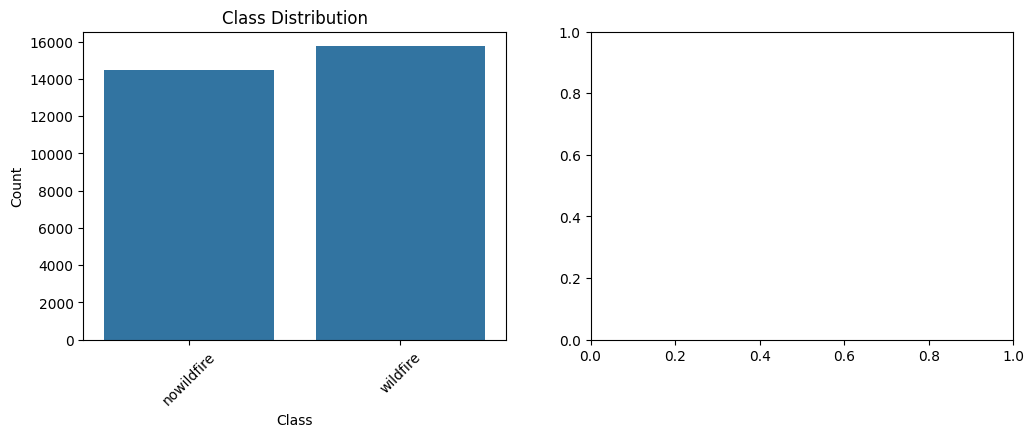

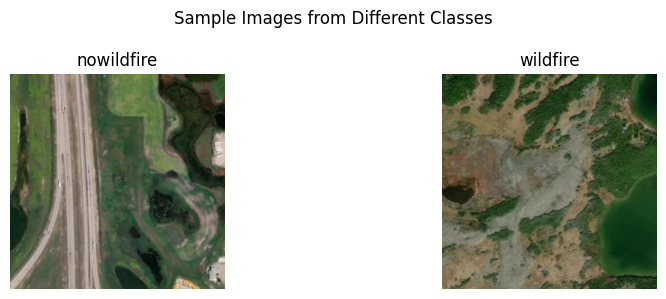

🔧 Using RobustImageFolder for error handling...
✅ Dataset built: 30250 valid images, 0 corrupted images skipped
✅ Dataset built: 6300 valid images, 0 corrupted images skipped
✅ Dataset built: 6300 valid images, 0 corrupted images skipped

📊 Dataset Information:
  Training (10% subset): 3025 images
  Validation (max 1000): 1000 images
  Test (max 1000): 1000 images
  Classes: ['nowildfire', 'wildfire']
  Sample image shape: torch.Size([3, 224, 224])
  Sample image label: nowildfire

📊 Exploratory Data Analysis:
Class imbalance ratio (max/min): 1.08


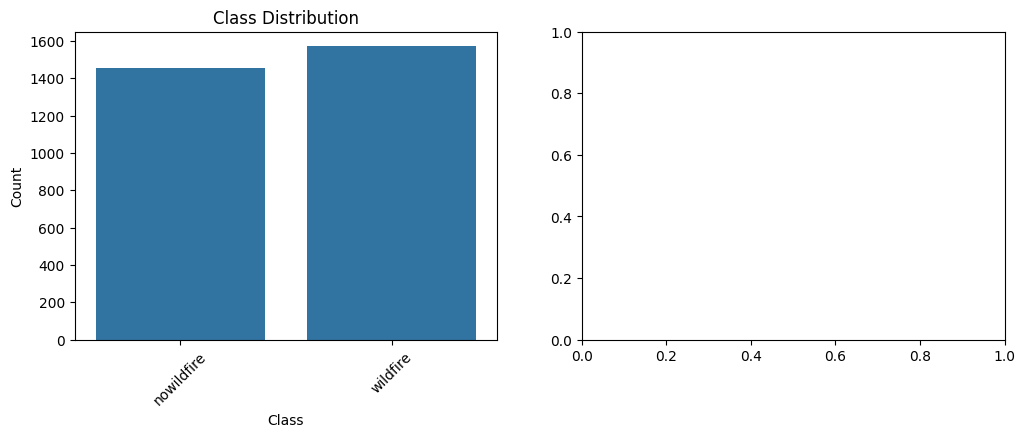

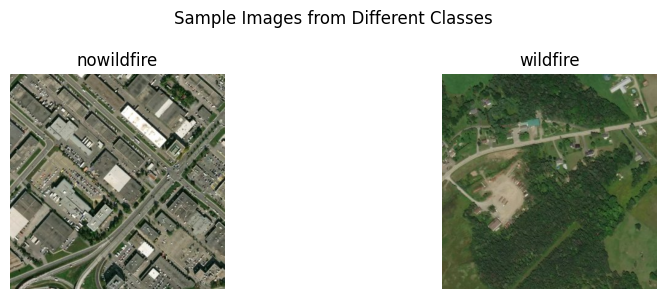

Model initialized: WildfireCNN
Total parameters: 26,145,922
Trainable parameters: 26,145,922
🚀 Starting model training for 2 epochs with learning rate 0.001...
Starting training for 2 epochs...
Learning rate: 0.001
--------------------------------------------------
Epoch 1/2


Validation: 100%|██████████| 63/63 [00:16<00:00,  3.71it/s]


Train Loss: 1.2233, Train Acc: 81.92%
Val Loss: 0.2890, Val Acc: 90.50%
Best Val Acc: 90.50%
--------------------------------------------------
Epoch 2/2


Validation: 100%|██████████| 63/63 [00:18<00:00,  3.43it/s]


Train Loss: 0.3986, Train Acc: 86.45%
Val Loss: 0.2616, Val Acc: 89.80%
Best Val Acc: 90.50%
--------------------------------------------------
Training completed! Best validation accuracy: 90.50%
✅ Training completed successfully!

🔎 Evaluating model on test set...


Testing:  63%|██████▎   | 40/63 [00:11<00:06,  3.44it/s]

⚠️ Error loading image test\wildfire\-73.15884,46.38819.jpg: image file is truncated (51 bytes not processed)


Testing: 100%|██████████| 63/63 [00:18<00:00,  3.49it/s]


MODEL EVALUATION RESULTS
Test Loss: 0.2643
Test Accuracy: 91.90%
Precision: 0.9207
Recall: 0.9190
F1-Score: 0.9184

Detailed Classification Report:
              precision    recall  f1-score   support

  nowildfire       0.95      0.86      0.90       425
    wildfire       0.90      0.96      0.93       575

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.92      0.92      0.92      1000



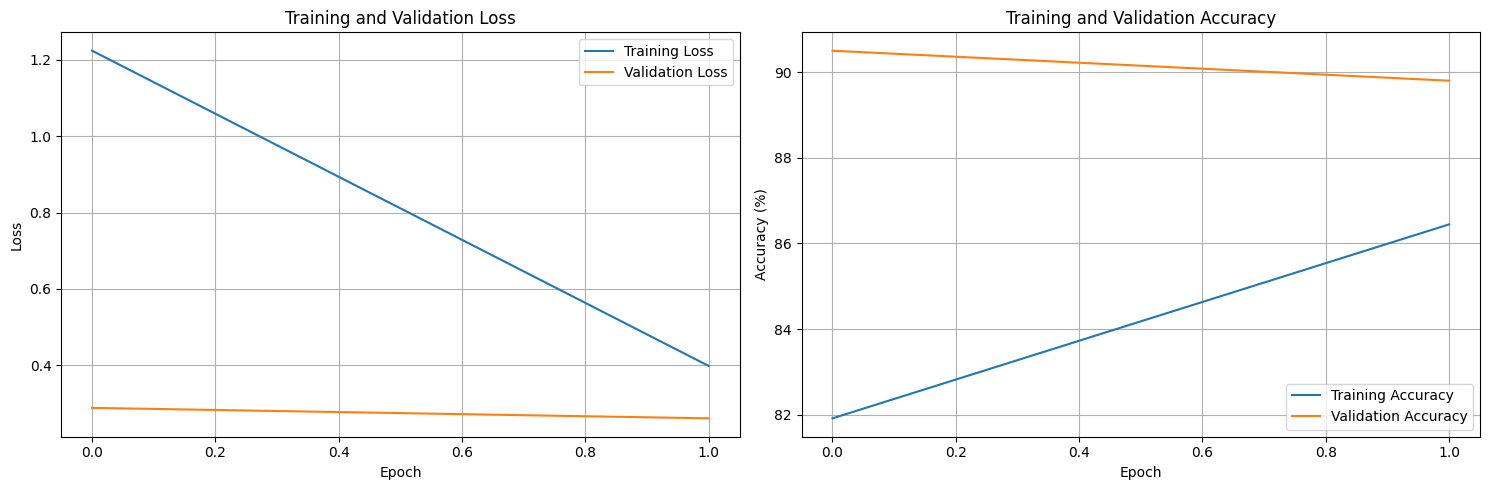

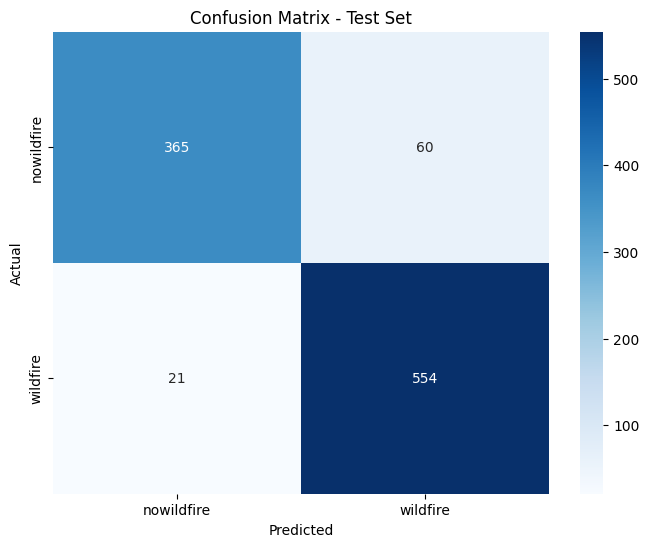

🎨 Visualizing sample predictions...


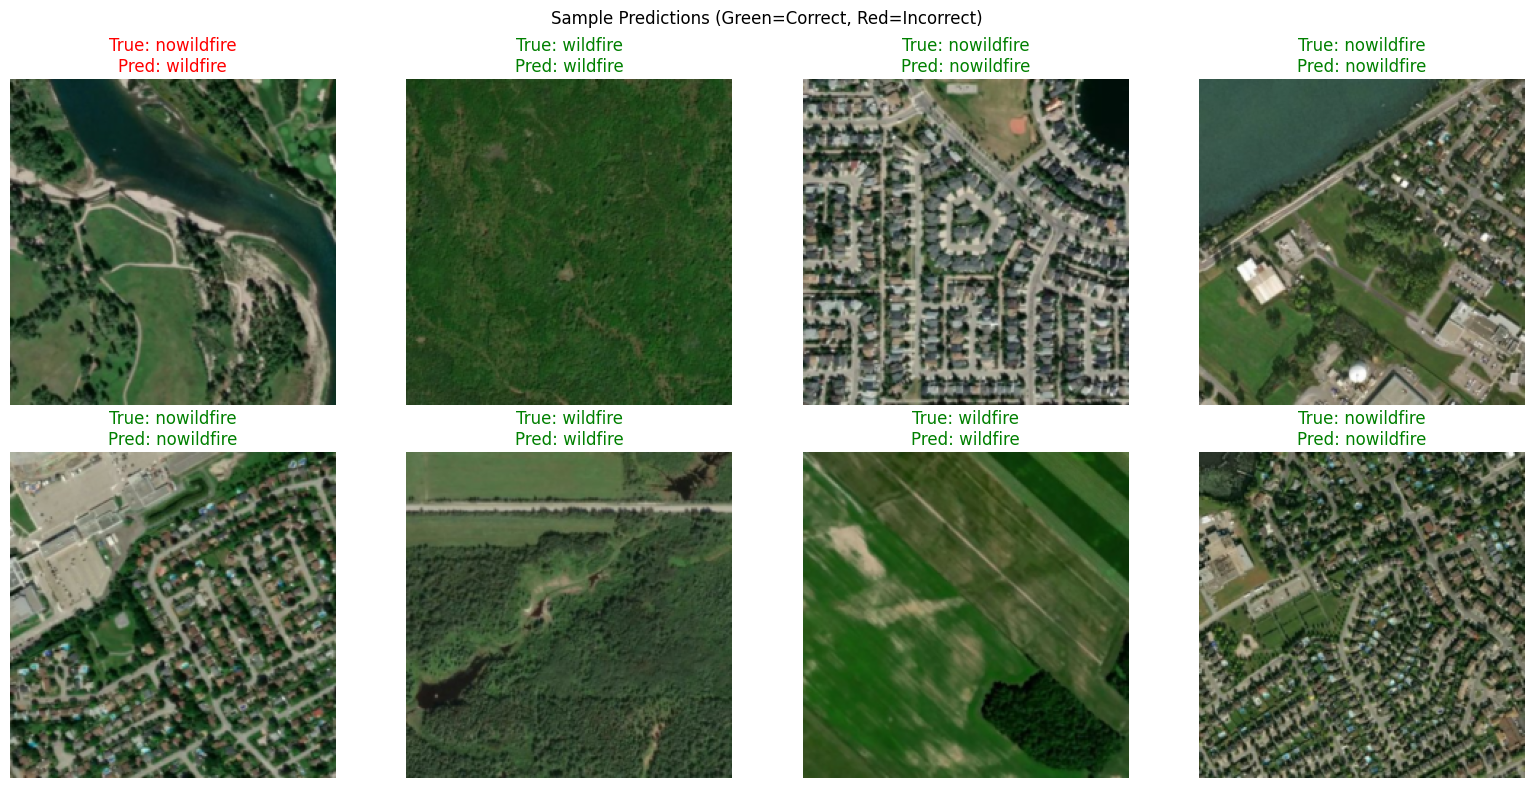

💾 Model saved to wildfire_model.pth

🔍 Testing inference function...
Sample image: test\nowildfire\-114.008951,50.903485.jpg
True class: nowildfire
Predicted class: wildfire
Confidence: 0.5522


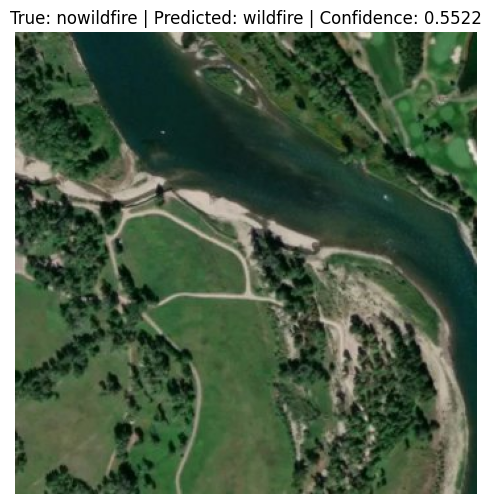

🔥 WILDFIRE PREDICTION PROJECT SUMMARY
📊 Dataset Information:
   • Training samples: 3,025
   • Validation samples: 1,000
   • Test samples: 1,000
   • Classes: ['nowildfire', 'wildfire']

🤖 Model Information:
   • Architecture: WildfireCNN
   • Total parameters: 26,145,922
   • Training epochs: 2
   • Learning rate: 0.001

📈 Training Results:
   • Best validation accuracy: 90.50%
   • Final training accuracy: 86.45%
   • Final validation accuracy: 89.80%

🎯 Test Results:
   • Test accuracy: 91.90%
   • Test precision: 0.9207
   • Test recall: 0.9190
   • Test F1-score: 0.9184

💾 Model saved to: wildfire_model.pth

🔍 Key Insights:
   ✅ Model achieved good performance (>85% accuracy)

🚀 Next Steps:
   1. Experiment with different architectures (ResNet, EfficientNet)
   2. Try advanced data augmentation techniques
   3. Implement ensemble methods
   4. Fine-tune hyperparameters
   5. Collect more diverse training data
🎉 PROJECT COMPLETED SUCCESSFULLY!


In [2]:
# ===============================
# Wildfire Prediction Project (fixed)
# ===============================
# Complete pipeline for wildfire detection from satellite images

# 1. Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

# ===============================
# 2. Custom Dataset Class with Error Handling
# ===============================

class RobustImageFolder(Dataset):
    """Custom dataset that handles corrupted images gracefully."""
    
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.samples = []
        self.classes = []
        self.class_to_idx = {}
        
        # Build dataset
        self._build_dataset()
    
    def _build_dataset(self):
        """Build dataset while skipping corrupted images."""
        if not os.path.exists(self.root):
            raise ValueError(f"Directory {self.root} does not exist")
        
        # Get class names
        self.classes = sorted([d for d in os.listdir(self.root) 
                              if os.path.isdir(os.path.join(self.root, d))])
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        
        # Build samples list
        corrupted_count = 0
        valid_count = 0
        
        for class_name in self.classes:
            class_dir = os.path.join(self.root, class_name)
            class_idx = self.class_to_idx[class_name]
            
            for filename in os.listdir(class_dir):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(class_dir, filename)
                    
                    # Test if image is valid
                    if self._is_valid_image(file_path):
                        self.samples.append((file_path, class_idx))
                        valid_count += 1
                    else:
                        corrupted_count += 1
                        print(f"⚠️ Skipping corrupted image: {file_path}")
        
        print(f"✅ Dataset built: {valid_count} valid images, {corrupted_count} corrupted images skipped")
    
    def _is_valid_image(self, path):
        """Check if image file is valid and not corrupted."""
        try:
            with Image.open(path) as img:
                img.verify()  # Verify the image
            return True
        except (OSError, IOError, Image.UnidentifiedImageError):
            return False
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        
        try:
            with Image.open(path) as img:
                sample = img.convert('RGB')
            
            if self.transform is not None:
                sample = self.transform(sample)
            
            return sample, target
        
        except Exception as e:
            print(f"⚠️ Error loading image {path}: {e}")
            # Return a dummy image if loading fails
            dummy_img = Image.new('RGB', (224, 224), color='black')
            if self.transform is not None:
                dummy_img = self.transform(dummy_img)
            return dummy_img, target

# Helper to safely get classes and samples from dataset or Subset
def get_dataset_attr(ds, attr_name):
    if hasattr(ds, 'dataset'):
        return getattr(ds.dataset, attr_name)
    return getattr(ds, attr_name)

# ===============================
# 3. Dataset Loading and EDA
# ===============================

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

valid_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Load datasets with robust error handling
print("Loading datasets with robust error handling...")
train_dataset = RobustImageFolder(root="train", transform=train_transform)
valid_dataset = RobustImageFolder(root="valid", transform=valid_test_transform)
test_dataset = RobustImageFolder(root="test", transform=valid_test_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)

# Dataset overview
print(f"Dataset sizes:")
print(f"  Training: {len(train_dataset)} images")
print(f"  Validation: {len(valid_dataset)} images")
print(f"  Test: {len(test_dataset)} images")
print(f"  Classes: {train_dataset.classes}")

# Sample image check
if len(train_dataset) > 0:
    img, label = train_dataset[0]
    print(f"Sample image shape (C,H,W): {img.shape}")
    print(f"Sample image label: {train_dataset.classes[label]}")
else:
    print("No training images found.")

# Exploratory Data Analysis
print("\n📊 Exploratory Data Analysis:")

# Class distribution
labels = [label for _, label in train_dataset.samples]
train_labels = pd.DataFrame(labels, columns=["class_id"])
train_labels["class_name"] = train_labels["class_id"].map(lambda x: train_dataset.classes[x])

plt.figure(figsize=(12, 4))

# Class distribution plot
plt.subplot(1, 2, 1)
sns.countplot(x="class_name", data=train_labels, order=train_dataset.classes)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Class imbalance ratio
class_counts = train_labels["class_name"].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.2f}")

# Show sample images
plt.subplot(1, 2, 2)
fig, axes = plt.subplots(1, len(train_dataset.classes), figsize=(10, 3))
for idx, class_name in enumerate(train_dataset.classes):
    class_idx = train_dataset.class_to_idx[class_name]
    sample_idx = train_labels[train_labels.class_id == class_idx].index[0]
    img_path, _ = train_dataset.samples[sample_idx]
    img = plt.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(class_name)
    axes[idx].axis("off")
plt.suptitle("Sample Images from Different Classes")
plt.tight_layout()
plt.show()

# ===============================
# Dataset Loading Options
# ===============================

# Choose dataset loading method
USE_ROBUST_DATASET = True  # Set to False to use standard ImageFolder

if USE_ROBUST_DATASET:
    print("🔧 Using RobustImageFolder for error handling...")
    # Load datasets with robust error handling
    train_dataset = RobustImageFolder(root="train", transform=train_transform)
    valid_dataset = RobustImageFolder(root="valid", transform=valid_test_transform)
    test_dataset = RobustImageFolder(root="test", transform=valid_test_transform)
else:
    print("📁 Using standard ImageFolder...")
    # Load datasets with standard PyTorch ImageFolder
    train_dataset = datasets.ImageFolder(root="train", transform=train_transform)
    valid_dataset = datasets.ImageFolder(root="valid", transform=valid_test_transform)
    test_dataset = datasets.ImageFolder(root="test", transform=valid_test_transform)

# Use only 10% of training dataset
total_size = len(train_dataset)
subset_size = int(0.1 * total_size)
if subset_size <= 0:
    subset_size = total_size

indices = np.random.choice(total_size, size=subset_size, replace=False)
train_dataset = Subset(train_dataset, indices)

# Limit validation and test sets to 1000 samples each (if larger)
valid_size = min(1000, len(valid_dataset))
test_size = min(1000, len(test_dataset))
valid_indices = np.random.choice(len(valid_dataset), size=valid_size, replace=False)
test_indices = np.random.choice(len(test_dataset), size=test_size, replace=False)
valid_dataset = Subset(valid_dataset, valid_indices)
test_dataset = Subset(test_dataset, test_indices)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)

# Dataset overview
classes = get_dataset_attr(train_dataset, 'classes')
print(f"\n📊 Dataset Information:")
print(f"  Training (10% subset): {len(train_dataset)} images")
print(f"  Validation (max 1000): {len(valid_dataset)} images")
print(f"  Test (max 1000): {len(test_dataset)} images")
print(f"  Classes: {classes}")

# Sample image check
if len(train_dataset) > 0:
    img, label = train_dataset[0]
    print(f"  Sample image shape: {img.shape}")
    print(f"  Sample image label: {classes[label]}")
else:
    print("No training images available in subset.")

# ===============================
# 3. Exploratory Data Analysis (EDA) - for subset
# ===============================

print("\n📊 Exploratory Data Analysis:")

# Class distribution for subset
labels = [train_dataset.dataset.samples[i][1] for i in train_dataset.indices]
train_labels = pd.DataFrame(labels, columns=["class_id"])
train_labels["class_name"] = train_labels["class_id"].map(lambda x: train_dataset.dataset.classes[x])

plt.figure(figsize=(12, 4))

# Class distribution plot
plt.subplot(1, 2, 1)
sns.countplot(x="class_name", data=train_labels, order=train_dataset.dataset.classes)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Class imbalance ratio
class_counts = train_labels["class_name"].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.2f}")

# Show sample images
plt.subplot(1, 2, 2)
fig, axes = plt.subplots(1, len(train_dataset.dataset.classes), figsize=(10, 3))
for idx, class_name in enumerate(train_dataset.dataset.classes):
    class_idx = train_dataset.dataset.class_to_idx[class_name]
    # Find a sample index belonging to this class
    sample_global_idx = [i for i in train_dataset.indices if train_dataset.dataset.samples[i][1] == class_idx][0]
    img_path, _ = train_dataset.dataset.samples[sample_global_idx]
    img = plt.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(class_name)
    axes[idx].axis("off")
plt.suptitle("Sample Images from Different Classes")
plt.tight_layout()
plt.show()

# ===============================
# 4. Model Definition
# ===============================

class WildfireCNN(nn.Module):
    """Custom CNN for wildfire detection."""
    def __init__(self, num_classes=2):
        super(WildfireCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        
        # Pooling and dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)
        
        # Activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Convolutional layers with batch norm and pooling
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        
        # Flatten and fully connected layers
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

class WildfireResNet(nn.Module):
    """Pre-trained ResNet18 for wildfire detection."""
    def __init__(self, num_classes=2):
        super(WildfireResNet, self).__init__()
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        # Freeze early layers
        for param in self.resnet.parameters():
            param.requires_grad = False
        # Replace the final layer
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
        
    def forward(self, x):
        return self.resnet(x)

# Initialize model (choose one)
num_classes = len(get_dataset_attr(train_dataset, 'classes'))
model = WildfireCNN(num_classes=num_classes).to(device)
# model = WildfireResNet(num_classes=num_classes).to(device)

print(f"Model initialized: {model.__class__.__name__}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# ===============================
# 5. Training Functions
# ===============================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train the model for one epoch."""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc="Training")):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

def validate_epoch(model, val_loader, criterion, device):
    """Validate the model for one epoch."""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc="Validation"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            
            running_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    epoch_loss = running_loss / len(val_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

def train_model(model, train_loader, val_loader, num_epochs, learning_rate, device):
    """Complete training loop."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
    
    # Track metrics
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []
    best_val_acc = 0.0
    best_model_state = copy.deepcopy(model.state_dict())  # Ensure always initialized
    
    print(f"Starting training for {num_epochs} epochs...")
    print(f"Learning rate: {learning_rate}")
    print("-" * 50)
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        
        # Train
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validate
        val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)
        
        # Update scheduler
        scheduler.step(val_loss)
        
        # Store metrics
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = copy.deepcopy(model.state_dict())
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Best Val Acc: {best_val_acc:.2f}%")
        print("-" * 50)
    
    # Load best model
    model.load_state_dict(best_model_state)
    print(f"Training completed! Best validation accuracy: {best_val_acc:.2f}%")
    
    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'val_losses': val_losses,
        'val_accs': val_accs,
        'best_val_acc': best_val_acc
    }

# ===============================
# 6. Model Training
# ===============================

# Training hyperparameters
NUM_EPOCHS = 2
LEARNING_RATE = 0.001

# Ensure device is defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start training
print(f"🚀 Starting model training for {NUM_EPOCHS} epochs with learning rate {LEARNING_RATE}...")
training_history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=valid_loader,
    num_epochs=NUM_EPOCHS,
    learning_rate=LEARNING_RATE,
    device=device
)

print("✅ Training completed successfully!")

# ===============================
# 7. Model Evaluation
# ===============================

def evaluate_model(model, test_loader, device, class_names):
    """Evaluate model on test set and return detailed metrics."""
    model.eval()
    all_predictions = []
    all_targets = []
    test_loss = 0.0
    correct = 0
    total = 0
    
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            
            test_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / total
    
    # Calculate additional metrics
    precision = precision_score(all_targets, all_predictions, average='weighted')
    recall = recall_score(all_targets, all_predictions, average='weighted')
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    
    print("=" * 50)
    print("MODEL EVALUATION RESULTS")
    print("=" * 50)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("=" * 50)
    
    # Classification report
    print("\nDetailed Classification Report:")
    print(classification_report(all_targets, all_predictions, 
                              target_names=class_names))
    
    return {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': all_predictions,
        'targets': all_targets
    }

# Evaluate model and store results
classes_for_eval = get_dataset_attr(test_dataset, 'classes')
print("\n🔎 Evaluating model on test set...")
test_results = evaluate_model(model, test_loader, device, classes_for_eval)

# ===============================
# 8. Visualization and Analysis
# ===============================

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss curves
ax1.plot(training_history['train_losses'], label='Training Loss')
ax1.plot(training_history['val_losses'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Accuracy curves
ax2.plot(training_history['train_accs'], label='Training Accuracy')
ax2.plot(training_history['val_accs'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(test_results['targets'], test_results['predictions'])
classes_for_cm = get_dataset_attr(train_dataset, 'classes')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes_for_cm, 
            yticklabels=classes_for_cm)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Sample predictions visualization
def visualize_predictions(model, test_loader, device, class_names, num_samples=8):
    """Visualize sample predictions."""
    model.eval()
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()
    
    with torch.no_grad():
        count = 0
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            
            batch_size = data.size(0)
            for b in range(batch_size):
                if count >= num_samples:
                    break
                # Denormalize image for display
                img = data[b].cpu()
                img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
                img = img + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
                img = torch.clamp(img, 0, 1)
                
                axes[count].imshow(img.permute(1, 2, 0))
                axes[count].set_title(f'True: {class_names[target[b]]}\nPred: {class_names[predicted[b]]}')
                axes[count].axis('off')
                
                # Color title based on correctness
                if target[b] == predicted[b]:
                    axes[count].title.set_color('green')
                else:
                    axes[count].title.set_color('red')
                count += 1
            if count >= num_samples:
                break
    
    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
    plt.tight_layout()
    plt.show()

# Visualize sample predictions
print("🎨 Visualizing sample predictions...")
visualize_predictions(model, test_loader, device, classes_for_eval)

# ===============================
# 9. Model Saving and Inference
# ===============================

def save_model(model, optimizer, training_history, test_results, filepath):
    """Save model and training information."""
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'training_history': training_history,
        'test_results': test_results,
        'model_class': model.__class__.__name__,
        'num_classes': len(get_dataset_attr(train_dataset, 'classes')),
        'class_names': get_dataset_attr(train_dataset, 'classes')
    }
    torch.save(checkpoint, filepath)
    print(f"💾 Model saved to {filepath}")

def predict_single_image(model, image_path, device, class_names, transform):
    """Predict class for a single image."""
    model.eval()
    
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # Make prediction
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.softmax(output, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    
    predicted_class_name = class_names[predicted_class.item()]
    confidence_score = confidence.item()
    
    return predicted_class_name, confidence_score

# Save the trained model
model_save_path = "wildfire_model.pth"
save_model(model, 
           optimizer=optim.Adam(model.parameters(), lr=LEARNING_RATE),
           training_history=training_history,
           test_results=test_results,
           filepath=model_save_path)

# Test inference on a sample image
print("\n🔍 Testing inference function...")
# Get a sample from test_dataset (handle Subset)
if hasattr(test_dataset, 'dataset') and len(test_dataset.indices) > 0:
    sample_global_idx = test_dataset.indices[0]
    sample_path, sample_label = test_dataset.dataset.samples[sample_global_idx]
else:
    sample_path, sample_label = test_dataset.samples[0]

sample_class = get_dataset_attr(train_dataset, 'classes')[sample_label]

predicted_class, confidence = predict_single_image(
    model, sample_path, device, get_dataset_attr(train_dataset, 'classes'), valid_test_transform
)

print(f"Sample image: {sample_path}")
print(f"True class: {sample_class}")
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.4f}")

# Display the image
img = Image.open(sample_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title(f"True: {sample_class} | Predicted: {predicted_class} | Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

# ===============================
# 10. Project Summary
# ===============================

print("=" * 60)
print("🔥 WILDFIRE PREDICTION PROJECT SUMMARY")
print("=" * 60)

print(f"📊 Dataset Information:")
print(f"   • Training samples: {len(train_dataset):,}")
print(f"   • Validation samples: {len(valid_dataset):,}")
print(f"   • Test samples: {len(test_dataset):,}")
print(f"   • Classes: {get_dataset_attr(train_dataset, 'classes')}")

print(f"\n🤖 Model Information:")
print(f"   • Architecture: {model.__class__.__name__}")
print(f"   • Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"   • Training epochs: {NUM_EPOCHS}")
print(f"   • Learning rate: {LEARNING_RATE}")

print(f"\n📈 Training Results:")
print(f"   • Best validation accuracy: {training_history['best_val_acc']:.2f}%")
print(f"   • Final training accuracy: {training_history['train_accs'][-1]:.2f}%")
print(f"   • Final validation accuracy: {training_history['val_accs'][-1]:.2f}%")

print(f"\n🎯 Test Results:")
print(f"   • Test accuracy: {test_results['test_accuracy']:.2f}%")
print(f"   • Test precision: {test_results['precision']:.4f}")
print(f"   • Test recall: {test_results['recall']:.4f}")
print(f"   • Test F1-score: {test_results['f1_score']:.4f}")

print(f"\n💾 Model saved to: {model_save_path}")

print("\n🔍 Key Insights:")
if test_results['test_accuracy'] > 85:
    print("   ✅ Model achieved good performance (>85% accuracy)")
elif test_results['test_accuracy'] > 75:
    print("   ⚠️  Model achieved moderate performance (75-85% accuracy)")
else:
    print("   ❌ Model needs improvement (<75% accuracy)")

print("\n🚀 Next Steps:")
print("   1. Experiment with different architectures (ResNet, EfficientNet)")
print("   2. Try advanced data augmentation techniques")
print("   3. Implement ensemble methods")
print("   4. Fine-tune hyperparameters")
print("   5. Collect more diverse training data")

print("=" * 60)
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)
